In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic Info of the dataset

In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Duplicates
we can see there is no any duplicates values in the datasets

In [9]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Changing date_added columns to datatype date

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
## Converting date_added datatypes from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Handeling Missing Values

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dropping the missing values may be the option but we may discard the information about the movies and shows. So, one way to handle missing values in this case is to fill the missing values with some text like 'Un-available'

In [14]:
df.fillna({'director': 'Unavailable', 'cast': 'Unavailable', 'country': 'Unavailable', 'rating': 'Unavailable'}, inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

### Now For date_added columns

In [15]:
## These are the row where there is no date_added values

df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


### Now for handeling the missing values of date_added which has the dtye of datetime <br>
First option is to fill the value with the most recent dates as the netflix produces more contents in recent year <br>
Second option is to find the actual date_added which is quite difficult <br>
Third option is to drop the values (Which results the loss of information) <br>

#### So we can consider option and fill the blank values with the most recent year

#### Analyzing data more

In [16]:
df['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [17]:
df['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [18]:
df['date_added'].mean()

Timestamp('2019-05-17 05:59:08.436967168')

In [19]:
df['date_added'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64

In [20]:
df['date_added'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

### But after analyzing dataset more i came to the conclusion that in 2020-01-01 more content were added so for missing values in date_added columns i replace missing values it with that date

In [21]:
# most_recent_entry_date = df['date_added'].max()
# df.fillna({'date_added': most_recent_entry_date}, inplace=True)

In [22]:
df['date_added'].fillna('2020-01-01', inplace=True)

#### After filling no missing values

In [23]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [24]:
## Proof that the missing values is replace with the date we extracted
df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2020-01-01,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [25]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

### For duration column

In [26]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [27]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unavailable', 'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### If we analyze the durations columns that has missing values, in rating columns there is actual time(duration)!!
So, this may be the human error and we can shift the rating values in duration

In [29]:
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']


In [30]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [31]:
df[df['director'] == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


#### Now overwriting rating columns

In [32]:
df.loc[df['director'] == 'Louis C.K.', 'rating']

5541    74 min
5794    84 min
5813    66 min
Name: rating, dtype: object

In [33]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'

In [34]:
df[df['director'] == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


#### Checking if there is other null values present

In [35]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [36]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

### Seems our data is clean

#### Visualizing the data

1) First let's compare the different types of shows

In [37]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

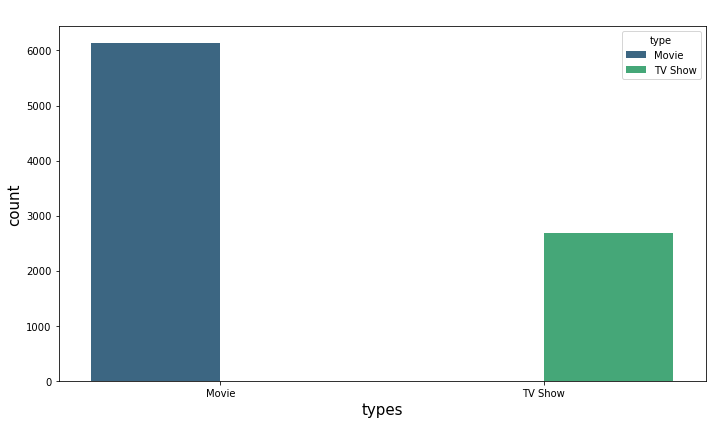

In [38]:
## Plotting it in countplot

plt.figure(figsize=(10,6))

ax = sns.countplot(x='type', data=df, hue='type', palette='viridis')

ax.set_title('Comparison', fontsize=18, fontweight='bold', color='white')
ax.set_xlabel('types', fontsize=15, color='black')
ax.set_ylabel('count', fontsize=15, color='black')




plt.tight_layout()
plt.show()

2) Top 10 countries to produce more contents

In [39]:
df['country'].value_counts().index[0:10]

Index(['United States', 'India', 'Unavailable', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object')

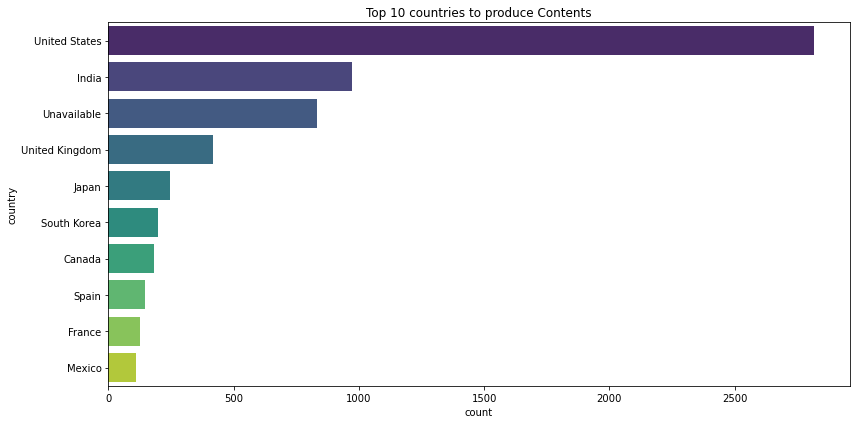

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10], data=df, palette='viridis')

plt.title('Top 10 countries to produce Contents')

plt.tight_layout()
plt.show()

3) In which year netflix added more contents

In [41]:
df.release_year.value_counts()[:10]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

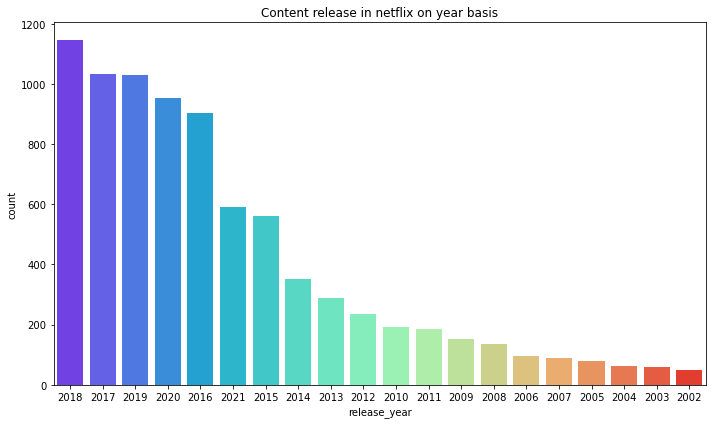

In [42]:
plt.figure(figsize=(10,6))

sns.countplot(x='release_year', order=df['release_year'].value_counts().index[0:20], data=df, palette='rainbow')

plt.title('Content release in netflix on year basis')

plt.tight_layout()
plt.show()


### Top 20 Genre in Netflix

In [43]:
df['listed_in'].value_counts()[:5]

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64

In [44]:
df['listed_in'].value_counts().index[0:5]

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies'],
      dtype='object')

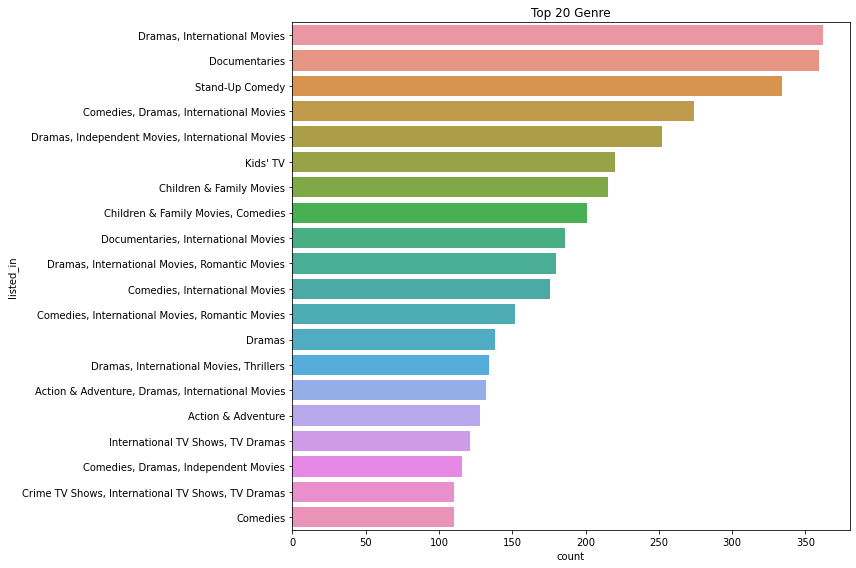

In [45]:
plt.figure(figsize=(12,8))

sns.countplot(y='listed_in', order=df['listed_in'].value_counts().index[0:20], data=df)

plt.title('Top 20 Genre')

plt.tight_layout()
plt.show()

Checking type of content based on country

In [46]:
movies_countries = df[df['type']=='Movie']
movies_series = df[df['type']=='TV Show']

In [47]:
movies_series.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


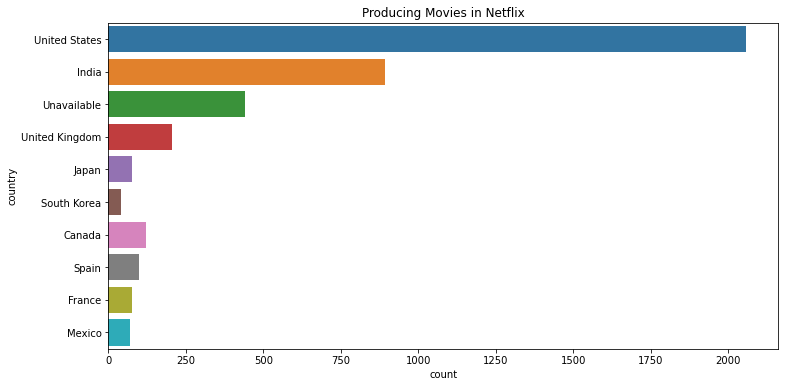

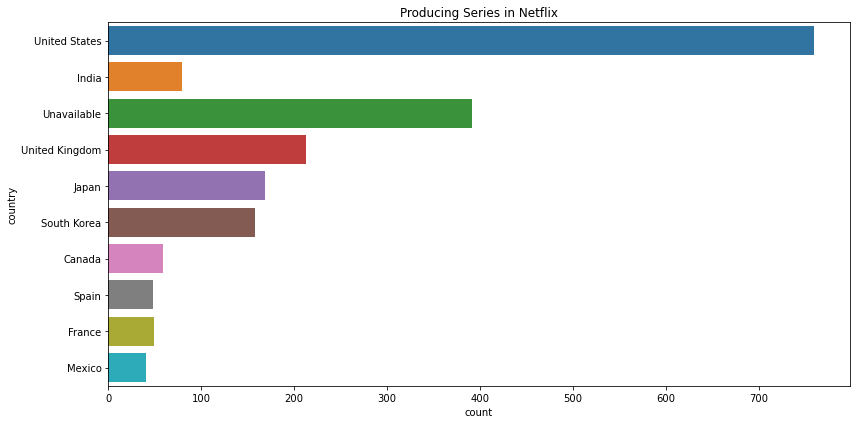

In [48]:
plt.figure(figsize=(12,6))

sns.countplot(y='country',order=df['country'].value_counts().index[0:10], data=movies_countries)
plt.title('Producing Movies in Netflix')

plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10], data=movies_series)
plt.title('Producing Series in Netflix')

plt.tight_layout()
plt.show()

# Some Questions

#### 1) Is there any duplicate values in the dataset? If Yes remove

In [49]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [50]:
## No duplicate value
## If there was

# df.drop_duplicates() ## code

### Q1 For 'House of Cards', what is the show id and who is the director of the show

In [51]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [52]:
df[df['title'] == 'House of Cards']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,Unavailable,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2021-04-14,2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


#### Other Methods

In [53]:
df[df['title'].isin(['House of Cards'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,Unavailable,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2021-04-14,2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [54]:
df[df['title'].str.contains('House of Cards')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,Unavailable,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2021-04-14,2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### In which year highest number of Tv shows and Movies is produced

In [55]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [56]:
df['date_added'].dt.year.value_counts()

2019    2016
2020    1889
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

### How many Tv shows and Movies are there in dataset

In [57]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [58]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [59]:
## Same method with group by

df.groupby(['type'])['type'].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

### Show all movies that were released in year 2000

In [60]:
df.dtypes['release_year']

dtype('int64')

In [61]:
df['release_year'] = pd.to_datetime(df['release_year'])

In [62]:
df.dtypes['release_year']

dtype('<M8[ns]')

In [63]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [64]:
df['Year'] = df['release_year'].dt.year

In [65]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970


In [66]:
# According to Questions

# df[df['Year'] == 1970]

# df[df['type'] == 'Movie']

# df[(df['Year'] == 1970) & (df['type'] == 'Movie')].head(5)

df[(df['type'] == 'Movie') & (df['Year'] == 1970)].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unavailable,2021-09-24,1970-01-01 00:00:00.000002021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1970


### Show only the title of all the Tv shows that were released in india only

In [67]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970


In [68]:
# df[ df['type'] == 'TV Show'] & df['country'] == 'India'

df[ (df['type'] == 'TV Show') & (df['country'] == 'India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

### Show top 10 directors, who gave the highest number of movies and tv shows  to netflix?

In [69]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970


In [71]:
df['director'].value_counts().head(10)

Unavailable               2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

In [72]:
df['director'].value_counts()[1:11]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

In [73]:
df['director'].value_counts().index[0:10]

Index(['Unavailable', 'Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Jay Chapman',
       'Youssef Chahine', 'Martin Scorsese'],
      dtype='object')

### Show records where type is Movie and Type is Comedies or Country is United Kingdom

Filtering And and or operators

In [74]:
## AND
df[ (df['type']=='Movie') & (df['listed_in']=='Comedies')].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,1970-01-01 00:00:00.000002010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,1970
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,2021-09-01,1970-01-01 00:00:00.000002016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,1970
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,2021-09-01,1970-01-01 00:00:00.000002008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...,1970
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,2021-08-01,1970-01-01 00:00:00.000001995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...,1970
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States",2021-08-01,1970-01-01 00:00:00.000002019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",1970


In [75]:
df[ (df['type']=='Movie') & (df['listed_in']=='Comedies') | (df['country']=='United Kingdom')].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970-01-01 00:00:00.000002021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,1970
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,1970-01-01 00:00:00.000002010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,1970
32,s33,TV Show,Sex Education,Unavailable,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,1970-01-01 00:00:00.000002020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,1970
65,s66,TV Show,Numberblocks,Unavailable,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,1970-01-01 00:00:00.000002021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",1970
72,s73,TV Show,Jack Whitehall: Travels with My Father,Unavailable,"Jack Whitehall, Michael Whitehall",United Kingdom,2021-09-14,1970-01-01 00:00:00.000002021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,1970


### In how many TV Shows and Movies Tom Cruise is an lead cast

In [76]:
df[df['cast'] == 'Tom Cruise']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year


No results because in cast there are multiple names, the above method ry to looks only 'Tom Cruise' so nothing printed

In [77]:
## Other method
df[df['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1970-01-01 00:00:00.000001999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",1970
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1970-01-01 00:00:00.000001988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",1970


#### HOw many movies got the R ratinng in Canada

In [78]:
df[ (df['type'] == 'Movie') & (df['rating'] == 'R') & (df['country'] == 'Canada')].shape

(16, 13)

#### HOw many movies got the TV-MA rating before 2018

In [79]:
df[ (df['type'] == 'Movie') & (df['rating'] == 'TV-MA') & (df['Year'] < 2018)].shape

(2062, 13)

#### Which country has the highest number of TV Shows

In [80]:
highest_tv_shows_country = df[df['type'] == 'TV Show']

In [81]:
highest_tv_shows_country.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970


In [82]:
highest_tv_shows_country.country.value_counts()[0:1]

United States    760
Name: country, dtype: int64

### Sorting Dataset by Year

In [83]:
df.sort_values(by='Year', ascending=False).head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970
5874,s5875,Movie,Ip Man 2,Wilson Yip,"Donnie Yen, Sammo Kam-Bo Hung, Huang Xiaoming,...","Hong Kong, China",2016-01-15,1970-01-01 00:00:00.000002010,R,108 min,"Action & Adventure, International Movies","New in Hong Kong, martial arts instructor Ip M...",1970
